# Step 3: Add Population Feature Using WorldPop

This notebook uses population raster data from WorldPop to estimate the number of people in each grid cell within Kawempe. It adds a `pop_est` feature to the ML-ready grid for risk prioritization.

In [1]:
import geopandas as gpd
import rasterio
from rasterstats import zonal_stats
import matplotlib.pyplot as plt
import pandas as pd

## Load Grid and WorldPop Population Raster

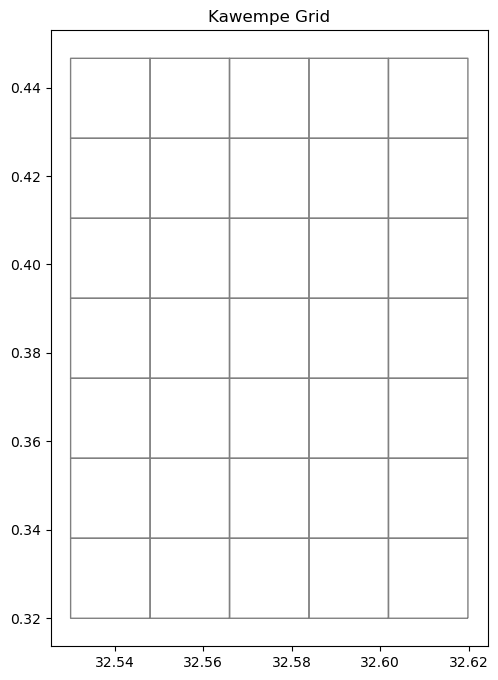

In [2]:
# Load the grid file from the previous step
grid = gpd.read_file('../data/processed/kawempe_grid_features.geojson')

# Load WorldPop raster path (modify if needed)
pop_raster_path = '../data/raw/uga_ppp_2020_1km_Aggregated.tif'

# Preview grid
grid.plot(edgecolor='gray', facecolor='none', figsize=(8, 8))
plt.title('Kawempe Grid')
plt.show()

## Compute Population per Grid Cell

In [3]:
# Compute zonal population stats
pop_stats = zonal_stats(
    grid.to_json(),
    pop_raster_path,
    stats=['sum'],
    geojson_out=True
)

# Add pop_est to grid
pop_grid = gpd.GeoDataFrame.from_features(pop_stats).set_crs('EPSG:4326')
pop_grid = pop_grid.rename(columns={'sum': 'pop_est'})
pop_grid['pop_est'] = pop_grid['pop_est'].fillna(0).astype(int)
pop_grid.head()

,geometry,mean_ndvi,building_count,service_count,road_km,cluster,risk_level,risk_score,pop_est
0,"POLYGON ((32.54795 0.31998, 32.54795 0.33807, ...",0.167570,0.0,0.0,0.0,3,Low,0.108374,58313
1,"POLYGON ((32.54795 0.33807, 32.54794 0.35616, ...",0.213353,0.0,0.0,0.0,3,Low,0.069680,43257
2,"POLYGON ((32.54794 0.35616, 32.54794 0.37426, ...",0.168311,0.0,0.0,0.0,3,Low,0.107748,56063
3,"POLYGON ((32.54794 0.37426, 32.54794 0.39235, ...",0.055386,0.0,0.0,0.0,0,Medium,0.203189,32730
4,"POLYGON ((32.54794 0.39235, 32.54794 0.41045, ...",0.000000,0.0,0.0,0.0,0,Medium,0.250000,25767


## Visualize Estimated Population

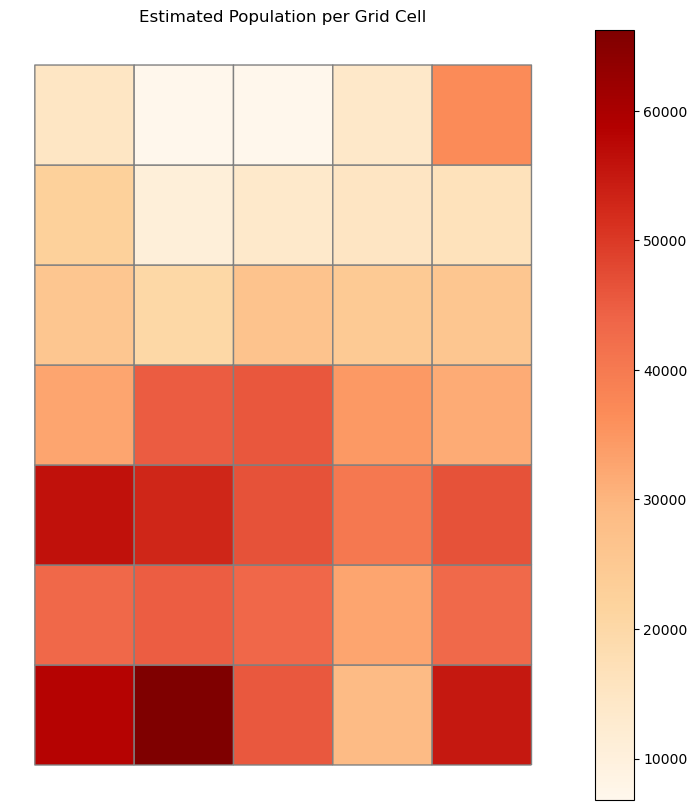

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
pop_grid.plot(column='pop_est', cmap='OrRd', legend=True, ax=ax, edgecolor='gray')
plt.title('Estimated Population per Grid Cell')
plt.axis('off')
plt.show()

## Save Updated Grid with Population

In [7]:
# Merge population back with other features (if needed)
pop_grid.to_file('../data/processed/kawempe_grid_with_population.geojson', driver='GeoJSON')